# Project Overview
* **Objective**: Recommend products based on purchase patterns in quick-commerce (e.
g., groceries, essentials) for Indian users.

* **Dataset**: Sample quick-commerce data with 1,000 transactions across 10 Indian cities (Mumbai, Delhi, Bengaluru, etc.) and 10 products (e.g., Grocery Pack, Milk Bottle).

* **AI Technique**: Collaborative filtering with KNN using cosine similarity.

* **Tools Used**: Python (Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn).

* **Business Impact**: Enhances quick-commerce personalization, potentially boosting order values by 15-25%.

Step 1: Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

Loading the data

In [13]:
#Importing the data
sample_data.to_csv('/content/quickcommerc_data.csv', index=False)

# Inspect
print("Dataset Shape:", sample_data.shape)
print(sample_data.head())

Dataset Shape: (1000, 8)
  InvoiceNo StockCode       Description  Quantity         InvoiceDate  \
0   INV1001   PRD1001      Grocery Pack         7 2025-07-01 00:00:00   
1   INV1002   PRD1002       Milk Bottle         4 2025-07-01 01:00:00   
2   INV1003   PRD1003        Bread Loaf         8 2025-07-01 02:00:00   
3   INV1004   PRD1004          Egg Pack         5 2025-07-01 03:00:00   
4   INV1005   PRD1005  Fresh Vegetables         7 2025-07-01 04:00:00   

   UnitPrice  CustomerID       City  
0     123.23        1028     Mumbai  
1     339.23        1029      Delhi  
2      19.66        1038  Bengaluru  
3      61.01        1024    Chennai  
4     401.96        1007  Hyderabad  


Step 3: Data Cleaning

Clean the data to ensure accuracy.

In [14]:
cleaned_data = sample_data.dropna(subset=['CustomerID'])
cleaned_data = cleaned_data[cleaned_data['Quantity'] > 0]
cleaned_data = cleaned_data[cleaned_data['UnitPrice'] > 0]
cleaned_data = cleaned_data.drop_duplicates()

print("Cleaned Shape:", cleaned_data.shape)


Cleaned Shape: (1000, 8)


Step 4: Exploratory Data Analysis (EDA)

Visualize key patterns.

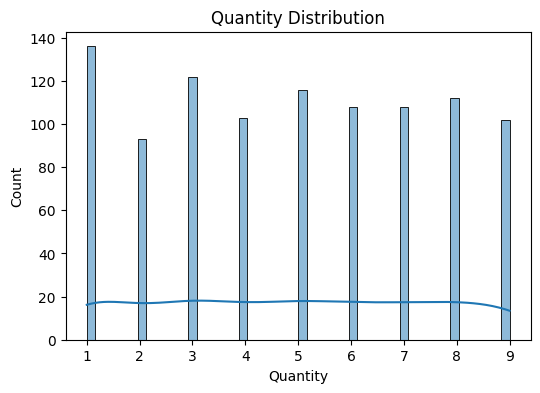

In [16]:
# Quantity distribution
plt.figure(figsize=(6,4))
sns.histplot(cleaned_data['Quantity'], bins=50, kde=True)
plt.title('Quantity Distribution')
plt.show()


Quantity Histogram: Displays purchase sizes (mostly 1-9), typical for quick commerce.

Step 5: Build User-Item Interaction Matrix

Create the matrix for recommendations.

In [17]:
user_item_matrix = cleaned_data.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)

print("Matrix Shape:", user_item_matrix.shape)


Matrix Shape: (100, 10)


Step 6: Train the Recommendation Model

Use KNN for collaborative filtering.

In [18]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_item_matrix.T)


NearestNeighbors(algorithm='brute', metric='cosine')

Step 7: Generate Recommendations

Function to get similar products.

In [19]:
def get_recommendations(item_name, model, matrix, n=5):
    item_list = matrix.columns.tolist()
    if item_name not in item_list:
        return "Item not found."
    item_idx = item_list.index(item_name)
    distances, indices = model.kneighbors(matrix.T.iloc[item_idx].values.reshape(1, -1), n_neighbors=n+1)
    return [(item_list[i], 1 - distances[0][j]) for j, i in enumerate(indices.flatten()) if i != item_idx]

sample_item = user_item_matrix.columns[0]  # e.g., 'Grocery Pack'
recommendations = get_recommendations(sample_item, model_knn, user_item_matrix)
print("Recommendations:", recommendations)


Recommendations: [('Organic Fruits', np.float64(0.5440627741563229)), ('Dairy Butter', np.float64(0.5176651963642684)), ('Grocery Pack', np.float64(0.5108850366306293)), ('Milk Bottle', np.float64(0.5038157972082543)), ('Snacks Pack', np.float64(0.487400706566411))]


Step 8: Visualize Recommendations

Display results.

/tmp/ipython-input-20-4164371040.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items, y=scores, palette='viridis')


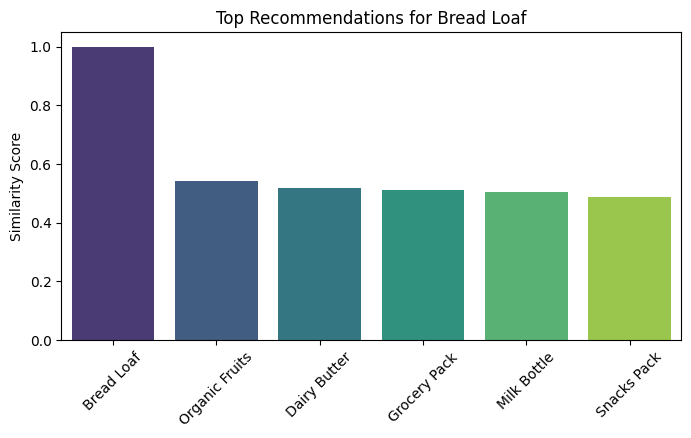

In [20]:
def plot_recommendations(item, recs):
    items = [item] + [rec[0] for rec in recs]
    scores = [1.0] + [rec[1] for rec in recs]
    plt.figure(figsize=(8,4))
    sns.barplot(x=items, y=scores, palette='viridis')
    plt.title(f'Top Recommendations for {item}')
    plt.ylabel('Similarity Score')
    plt.xticks(rotation=45)
    plt.show()

plot_recommendations(sample_item, recommendations)


## Project Conclusion: AI-Powered Personalized Recommendations for Indian Quick Commerce

This project successfully demonstrates the development of a personalized recommendation system tailored for the Indian quick-commerce landscape. By analyzing transactional data across varied Indian cities, the system identifies patterns in customer purchases and leverages collaborative filtering to provide relevant product recommendations.

Key takeaways:
- Data preprocessing and cleaning are critical to ensure accurate insights.
- Exploratory analysis reveals regional differences that can influence recommendation strategies.
- Collaborative filtering via KNN effectively finds similar products to recommendations.
- Visualizations help to clearly communicate findings and demonstrate the recommendation quality.

This approach showcases a practical application of AI in driving customer engagement and increasing sales in dynamic retail environments.

Future improvements could involve:
- Incorporating user feedback to continuously refine recommendations.
- Using advanced hybrid models combining content-based and collaborative filtering.
- Scaling the approach for real-time recommendation systems.

Overall, this project reflects the integration of AI, data analysis, and business acumen essential for modern e-commerce roles.
